In [290]:
import csv
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
import importlib

import matplotlib.pyplot as plt
import scipy.stats as stats
import math

from scipy.interpolate import Rbf
from numpy.random import randint
from IPython.display import Image
from scipy import stats
from pd_funcs import clean_funcs
from scipy.stats import norm, kurtosis
from scipy.stats import skew

importlib.reload(clean_funcs)

def examine_skew(df_in, 
                 str_in,
                 n_bins=90,
                 toggle_log = False,
                 verbose_plot=False):
    
    print(str_in, "skew:", df_in[str_in].skew())
    
    if(toggle_log):
        try:
            density = stats.gaussian_kde(np.log(df_in[str_in]))
        except ValueError:
            density = stats.gaussian_kde(np.log(df[str_in][df[str_in] > 0] )   )
    else:
        try:
            density = stats.gaussian_kde(df_in[str_in])
        except ValueError:
            density = stats.gaussian_kde(df[str_in])
    
    if(verbose_plot):
        try:
            n, x, _ = plt.hist(df_in[str_in], bins=90, 
                               histtype=u'step', density=True)
            plt.plot(x, density(x))
        except ValueError:
            n, x, _ = plt.hist(np.log(df[str_in][df[str_in] > 0] ),
                               bins=90, 
                               histtype=u'step',
                               density=True)
            plt.plot(x, density(x))

        plt.grid()
        plt.show()

def plot_pdf(data_in, n_bins =50):
    # Generate some data for this demonstration.
    data = data_in
    mu, std = norm.fit(data)

    # Plot the histogram.
    fig, ax1 = plt.subplots(figsize=(12, 12))
    
    plt.hist(data, 
             bins=n_bins, 
             density=True, 
             alpha=0.6)

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.grid()
    plt.title(title)

    plt.show()
    
    
pd.set_option('display.max_rows', None)

df = pd.read_csv('./datasets/Loan_Data.csv')

dfori = df.copy()

In [291]:
np.sort(df['Loan_Amount_Term'].unique())

array([ 12.,  36.,  60.,  84., 120., 180., 240., 300., 360., 480.,  nan])

In [292]:
clean_funcs.clean_df(df)

In [293]:
np.sort(df['Loan_Amount_Term'].unique())

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

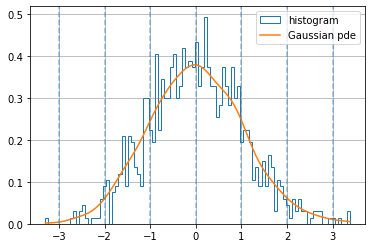

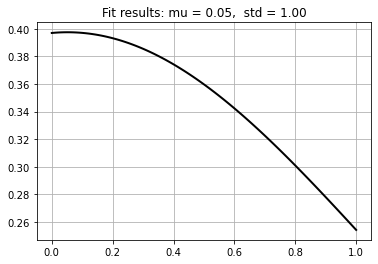

In [294]:
#Using scipy, you could use stats.gaussian_kde to estimate the probability density function (pdf):

#or you can fit it to norm

#Probability density function (PDF),
#is a function whose value at any given point in the sample space 
#can be interpreted as providing a relative likelihood that the value of the
#random variable would be equal to that sample...

#The likelihood of an outcome for a discrete random variable...

#Probability density as a function of number of standard deviations

noise = np.random.normal(0, 1,(1000, ))
densex = stats.gaussian_kde(noise) #KDE-Kernel Density Estimate
n, x, _ = plt.hist(noise, 
                   bins=100, 
                   histtype=u'step', 
                   density=True)  
plt.plot(x, densex(x))

for k in range(-3, 4):
    plt.axvline(x= k, 
                linestyle='--', 
                alpha=0.48)

plt.legend(['histogram', 'Gaussian pde'])
plt.grid()
plt.show()

#Different packages... roughly the same result

# Generate some data for this demonstration.
data = np.random.normal(0, 1, (1000, ))
mu, std = norm.fit(data)

# Plot the histogram.
#plt.hist(data, 
 #        bins=25, 
 #        density=True, 
 #        alpha=0.6)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.grid()
plt.title(title)

plt.show()

In [295]:
#Here is a neat animation:
#https://www.w3schools.com/statistics/statistics_normal_distribution.php

In [32]:
print(34.1*2, "percent of the sample fall within the plus minus 1 standard deviation")

68.2 percent of the sample fall within the plus minus 1 standard deviation


In [224]:
type(np.array([4, 6, 7, -1]))

numpy.ndarray

In [225]:
type(df['HouseIncome'])

pandas.core.series.Series

In [219]:
densex

In [10]:
type(densex)

scipy.stats.kde.gaussian_kde

In [251]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,HouseIncome
0,LP001002,0,1,0.0,0,0,5849,0.000000,146.412162,8.0,1.0,2,Y,5849.000000
1,LP001003,0,0,1.0,0,0,4583,1508.000000,128.000000,8.0,1.0,0,N,6091.000000
2,LP001005,0,0,0.0,0,1,3000,0.000000,66.000000,8.0,1.0,2,Y,3000.000000
3,LP001006,0,0,0.0,1,0,2583,2358.000000,120.000000,8.0,1.0,2,Y,4941.000000
4,LP001008,0,1,0.0,0,0,6000,0.000000,141.000000,8.0,1.0,2,Y,6000.000000
5,LP001011,0,0,2.0,0,1,5417,4196.000000,267.000000,8.0,1.0,2,Y,9613.000000
6,LP001013,0,0,0.0,1,0,2333,1516.000000,95.000000,8.0,1.0,2,Y,3849.000000
7,LP001014,0,0,3.0,0,0,3036,2504.000000,158.000000,8.0,0.0,1,N,5540.000000
8,LP001018,0,0,2.0,0,0,4006,1526.000000,168.000000,8.0,1.0,2,Y,5532.000000
9,LP001020,0,0,1.0,0,0,12841,10968.000000,349.000000,8.0,1.0,1,N,23809.000000


In [15]:
#Asymmetry

pdf_skew = 3 * (np.mean(data) - np.median(data)) / np.std(data)
pdf_skew 

0.05275275327762214

In [234]:
skew(noise)

0.0055335743861908504

In [229]:
df['HouseIncome'].skew()

5.633448514884535

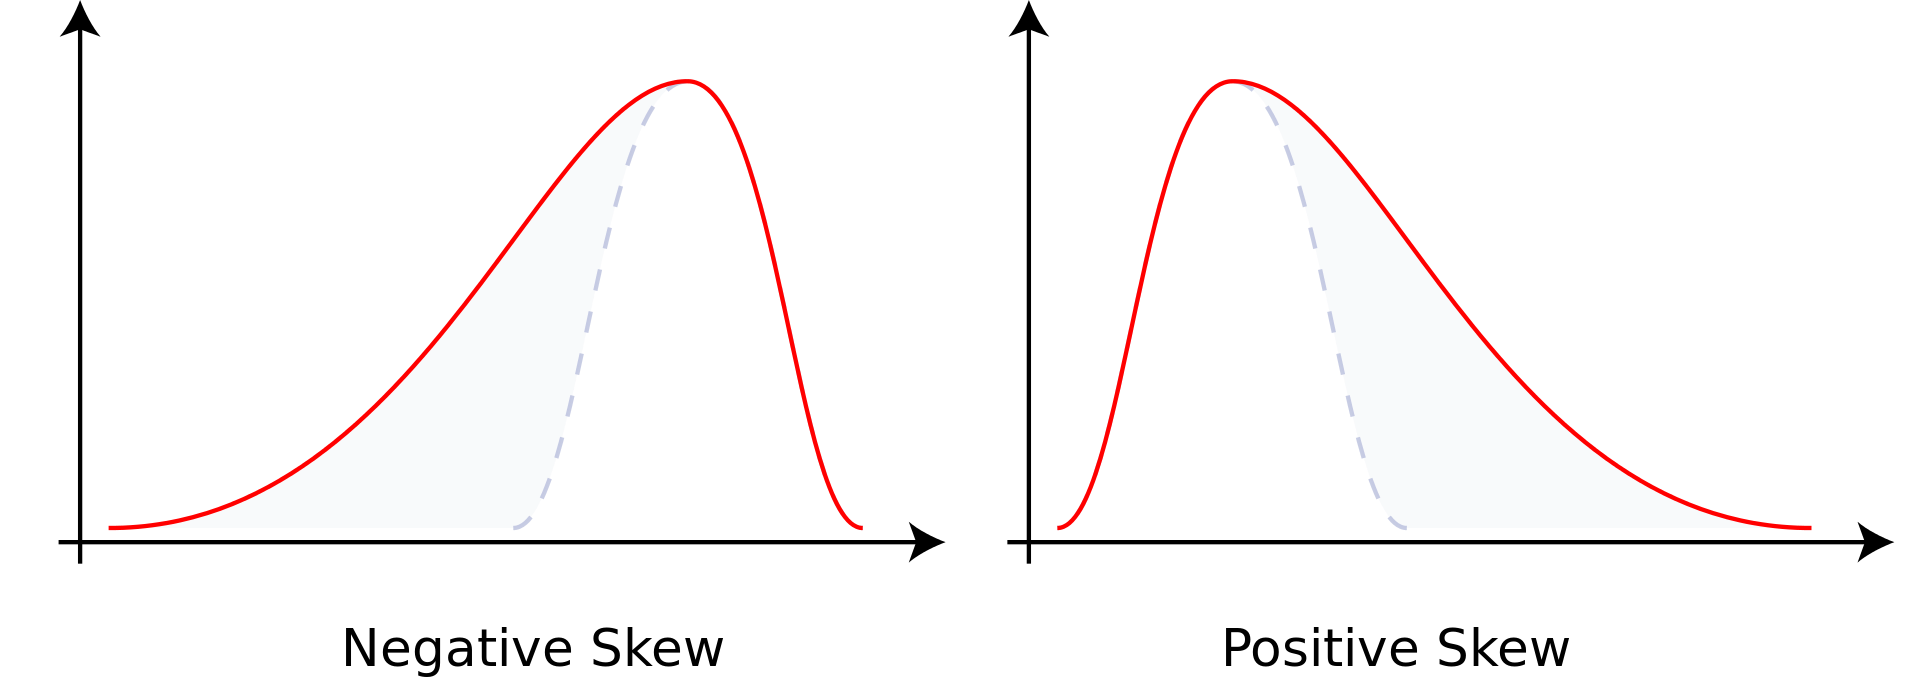

In [16]:
Image(filename='./skewLR.png') 

#Skewness 
#measures the degree and direction of asymmetry.  A symmetric distribution such as a normal distribution has a skewness of 0, a


In [247]:
#plt.scatter(x, density(x))

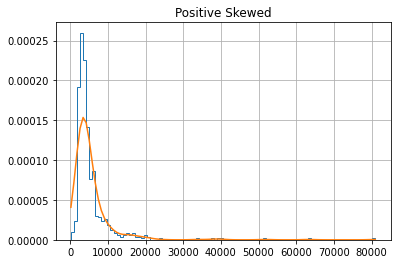

In [248]:
#Example
density = stats.gaussian_kde(df['ApplicantIncome'])
n, x, _ = plt.hist(df['ApplicantIncome'], bins=100, 
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.grid()
plt.title("Positive Skewed")
plt.show()

In [249]:
#A distribution that is skewed to the left (negative) when the mean is less than the median
#A distribution that is skewed to the right (positive) when the mean is greater than the median

print( "Mean:", np.mean(df['ApplicantIncome']) )
print( "Median:", np.median(df['ApplicantIncome'])   )

Mean: 5403.459283387622
Median: 3812.5


ApplicantIncome skew: 6.539513113994625


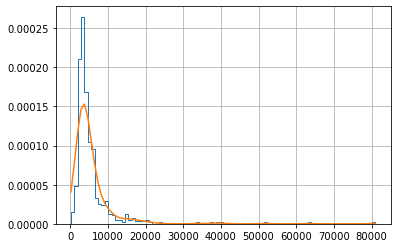

CoapplicantIncome skew: 7.491531216657306


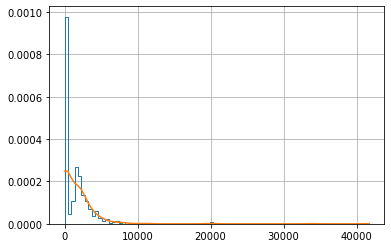

HouseIncome skew: 5.633448514884535


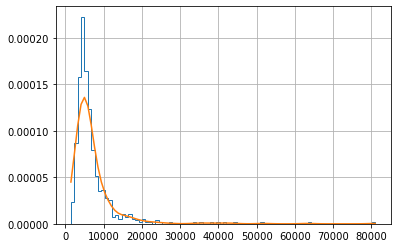

LoanAmount skew: 2.726601144105299


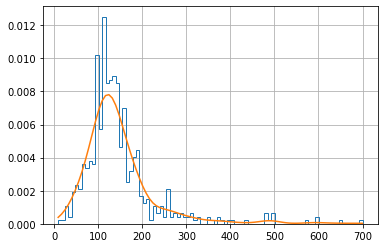

In [250]:
#Do skew
examine_skew(df, 'ApplicantIncome',verbose_plot=True)
examine_skew(df, 'CoapplicantIncome',verbose_plot=True)
examine_skew(df, 'HouseIncome', verbose_plot=True)

examine_skew(df, 'LoanAmount', verbose_plot=True)


#All the income are positively skewed
#Once combining the income the distribution of the incombe becomes less skewed (more symmetrical)

#loan amount is less skewed than income.

In [ ]:
#Now lets look at kurtosis which simply means tailedness

In [38]:
#Symmetrical Gaussian Variable... closes to 0 means less tail
kurtosis(data)

-0.15822209249908514

In [47]:
print("Applicant income kurtosis:", kurtosis(df['ApplicantIncome']))
print("Coapplicant income kurtosis:", kurtosis(df['CoapplicantIncome']))
print("Home income kurtosis:", kurtosis(df['HouseIncome']))

#Not nice
#Coapplicant has a longer tail than Applicant income

#Combined income has lower kurtosis... What does that mean?

Applicant income kurtosis: 60.0390403937373
Coapplicant income kurtosis: 84.25637650578992
Home income kurtosis: 45.40266965267774


In [252]:
df['LoanAmount']

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
5      267.000000
6       95.000000
7      158.000000
8      168.000000
9      349.000000
10      70.000000
11     109.000000
12     200.000000
13     114.000000
14      17.000000
15     125.000000
16     100.000000
17      76.000000
18     133.000000
19     115.000000
20     104.000000
21     315.000000
22     116.000000
23     112.000000
24     151.000000
25     191.000000
26     122.000000
27     110.000000
28      35.000000
29     120.000000
30     201.000000
31      74.000000
32     106.000000
33     114.000000
34     320.000000
35     146.412162
36     100.000000
37     144.000000
38     184.000000
39     110.000000
40      80.000000
41      47.000000
42      75.000000
43     134.000000
44      96.000000
45      88.000000
46      44.000000
47     144.000000
48     120.000000
49     144.000000
50     100.000000
51     120.000000
52     112.000000
53     134.000000
54     286.000000
55      97

In [132]:
#Loan Amount
print("Loan Amount skew:", df['LoanAmount'].skew())
print("Loan amount kurtosis:", kurtosis(df['LoanAmount']))

#Less skewed and less tailed than the incomes

Loan Amount skew: 2.726601144105299
Loan amount kurtosis: 10.79816910045601


In [254]:
len(df['HouseIncome']) - len(np.sort(df['HouseIncome'])[:460]    )

154

In [261]:
#Shave off the top...
#A distribution that is skewed to the left (negative) when the mean is less than the median
print("Skew:", skew(np.sort(df['HouseIncome'])[:420]    )   ) 

#Prove it...
print( "Mean:", np.mean(np.sort(df['HouseIncome'])[:420]) )
print( "Median:", np.median(np.sort(df['HouseIncome'])[:420])   )

Skew: -0.18914584796455142
Mean: 4548.785523782476
Median: 4613.5


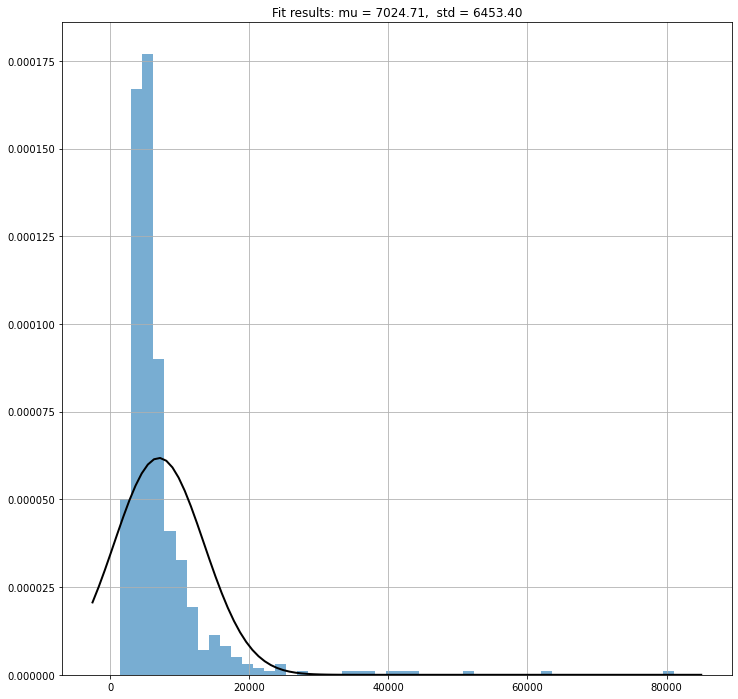

In [265]:
plot_pdf(np.sort(df['HouseIncome'])[:])

In [118]:
#Kurtosis
print("Kurtosis raw:", kurtosis(np.sort(df['HouseIncome'])[:])) #Quite tailed
print("Kurtosis reduced:",kurtosis(np.sort(df['HouseIncome'])[:420])) #Less tailed

#Skewness does not inform on the number of outliers; 
#it only communicates the direction of outliers.

#Application comes to mind... outlier rejection

arr = np.sort(df['HouseIncome'])

Kurtosis raw: 45.40266965267773
Kurtosis reduced: -0.726314855591319


In [275]:
#We have been informed about the shape
y_container = []

for k in range(0, len(df['HouseIncome'])):
    if(df['HouseIncome'][k] < np.mean(df['HouseIncome'])+1.2*np.std(df['HouseIncome']) and 
       df['HouseIncome'][k] > np.mean(df['HouseIncome'])-1.2*np.std(df['HouseIncome'])):
        y_container.append(df['HouseIncome'][k])

In [276]:
len(y_container)

574

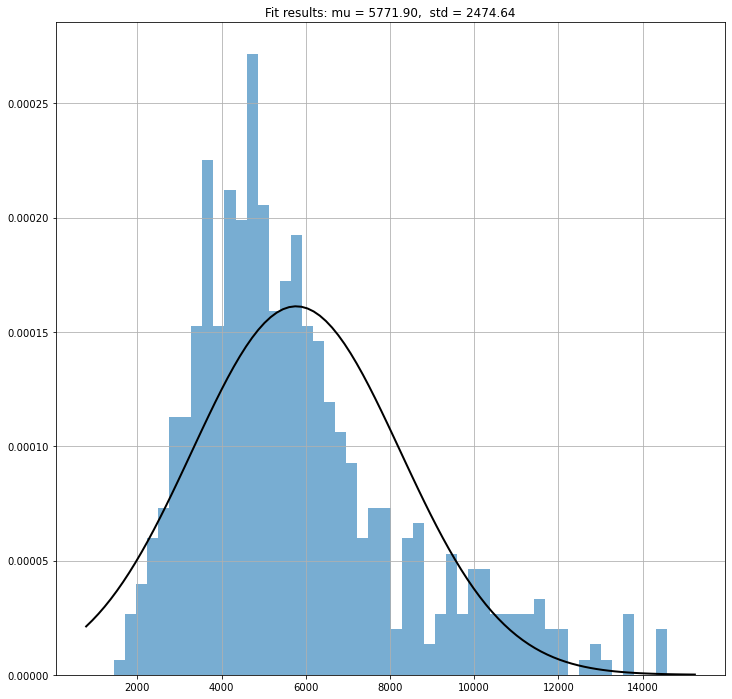

In [277]:
plot_pdf(y_container)

In [131]:
print("skew:", skew(y_container))
print("kurtosis:", kurtosis(y_container) )

skew: 0.9480704151941923
kurtosis: 0.5029325092327603


In [279]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,HouseIncome
0,LP001002,0,1,0.0,0,0,5849,0.000000,146.412162,8.0,1.0,2,Y,5849.000000
1,LP001003,0,0,1.0,0,0,4583,1508.000000,128.000000,8.0,1.0,0,N,6091.000000
2,LP001005,0,0,0.0,0,1,3000,0.000000,66.000000,8.0,1.0,2,Y,3000.000000
3,LP001006,0,0,0.0,1,0,2583,2358.000000,120.000000,8.0,1.0,2,Y,4941.000000
4,LP001008,0,1,0.0,0,0,6000,0.000000,141.000000,8.0,1.0,2,Y,6000.000000
5,LP001011,0,0,2.0,0,1,5417,4196.000000,267.000000,8.0,1.0,2,Y,9613.000000
6,LP001013,0,0,0.0,1,0,2333,1516.000000,95.000000,8.0,1.0,2,Y,3849.000000
7,LP001014,0,0,3.0,0,0,3036,2504.000000,158.000000,8.0,0.0,1,N,5540.000000
8,LP001018,0,0,2.0,0,0,4006,1526.000000,168.000000,8.0,1.0,2,Y,5532.000000
9,LP001020,0,0,1.0,0,0,12841,10968.000000,349.000000,8.0,1.0,1,N,23809.000000


In [ ]:
#Inferential Statistics

#Making infernece/ predictions about a sample. 

#Accusations and statements
    #Males make more money than females. PROOVE IT!
    #50% applicants that receive their loan have opted to pay back their loan payments within 1 year (Loan Term).
    #The Urban Applicant has more income than the Suburban Applicant

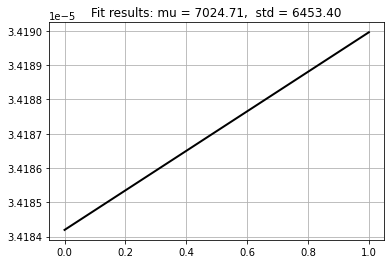

In [287]:
data = df['HouseIncome']
mu, std = norm.fit(data)

# Plot the histogram.
#plt.hist(data, 
#         bins=25, 
#         density=True, 
#         alpha=0.6)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.grid()
plt.title(title)

plt.show()

In [ ]:
z = (x - mu)/sigma

In [286]:
for k in range(0,len(stats.zscore( df['HouseIncome'])  ) ):
    print( stats.zscore( df['HouseIncome'])[k], "distance "    )

In [319]:
np.min( stats.zscore( np.sort(df['HouseIncome'])[:420] ))

-2.6597279809478795

In [280]:
stats.zscore( df['HouseIncome'])

0      -0.182184
1      -0.144684
2      -0.623656
3      -0.322885
4      -0.158785
5       0.401074
6      -0.492098
7      -0.230065
8      -0.231305
9       2.600844
10     -0.484195
11     -0.416014
12      0.643737
13     -0.361314
14     -0.718955
15     -0.321490
16     -0.531302
17     -0.544628
18     -0.331252
19     -0.143290
20      0.098443
21      0.705875
22     -0.389516
23     -0.270044
24     -0.059303
25      0.392862
26     -0.305685
27     -0.272524
28     -0.865079
29     -0.184663
30      0.079074
31     -0.597778
32     -0.361469
33     -0.287864
34      1.313306
35     -0.415704
36     -0.599173
37     -0.294218
38      0.674264
39     -0.249280
40     -0.530682
41     -0.621642
42     -0.716631
43     -0.115862
44     -0.361004
45     -0.560124
46     -0.213175
47     -0.186523
48     -0.145614
49     -0.116172
50     -0.535021
51     -0.610330
52     -0.433059
53     -0.373246
54      0.693478
55     -0.488069
56     -0.511622
57     -0.226037
58      0.5121

In [303]:
np.max(stats.zscore( df['HouseIncome']))*np.std(  df['HouseIncome'] )+np.mean(  df['HouseIncome'] )

81000.0

In [310]:
df['HouseIncome'][409]

81000.0

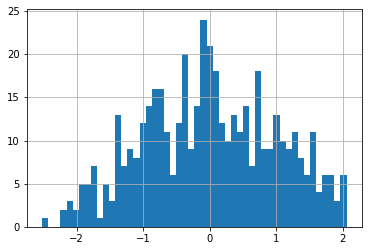

In [323]:
#Standard Normal Distribution (Z score/ Z value)

plt.hist(stats.zscore( np.sort(df['HouseIncome'])[:460]    ), bins=50)
plt.grid()
plt.show()

In [325]:
stats.norm.cdf(0)

0.5

In [312]:
n = 409

print("Z score:",    stats.zscore( df['HouseIncome'])[n],
      "Probability:",   stats.norm.cdf(stats.zscore( df['HouseIncome'])[n]) )

#Probability of getting less than a Z-value of
print("Z score:",    np.sort(stats.zscore( df['HouseIncome']))[-2],
      "Probability:",   stats.norm.cdf(   0  ))

print("Z score:",    np.sort(stats.zscore( df['HouseIncome']))[-2],
      "Probability:",   stats.norm.cdf(   np.sort(stats.zscore( df['HouseIncome']))[-2]  ))

#The probability of finding a Z value less than 8.725 ... 100 percent

Z score: 11.46299150032278 Probability: 1.0
Z score: 8.725985597297536 Probability: 0.5
Z score: 8.725985597297536 Probability: 1.0


In [328]:
(stats.norm.cdf(1)-stats.norm.cdf(-1))*100

68.26894921370858

In [326]:
stats.norm.cdf(-1)

0.15865525393145707

In [69]:
print("Percentage:", (stats.norm.cdf(1) -stats.norm.cdf(-1))*100  )

Percentage: 68.26894921370858


In [ ]:
#p-values... probability value
#p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test
#assuming that the null hypothesis is correct.

#
#p-value is the probability of encountering the cases of the observation or better given that the null is true.
#

#a smaller p value is stronger evidence in favor of the alternative hypothesis.

In [331]:
#df['HouseIncome']

In [329]:
#What is the percentage probability of income between 5000 and 6000
#Step 1: Get z scores
zscore6k = (6000-np.mean(df['HouseIncome']) )/np.std(df['HouseIncome'])
zscore5k = (5000-np.mean(df['HouseIncome']) )/np.std(df['HouseIncome'])

#Step 2: Subtract
prob_income = stats.norm.cdf(zscore6k )-stats.norm.cdf(zscore5k )

#Step 3: Sentence
print("If your income is between 5k and 6k you are within", prob_income*100, "percent of the entire sample")

If your income is between 5k and 6 you are within 6.00606394988365


In [334]:
#What is the percentage probability of income between 12000 and 10000
#Step 1: Get z scores
zscore12k = (12000-np.mean(df['HouseIncome']) )/np.std(df['HouseIncome'])
zscore10k = (10000-np.mean(df['HouseIncome']) )/np.std(df['HouseIncome'])

#Step 2: Subtract
prob_income = stats.norm.cdf(zscore12k )-stats.norm.cdf(zscore10k )

#Step 3: Sentence
print("If your income is between 12k and 10k you are within", prob_income*100,"percent of the entire sample of the sample" )

#Likewise you can work backwards and solve all sorts of problems

If your income is between 12k and 10k you are within 10.20176913129096 percent of the entire sample of the sample


In [352]:
#How much income do you make if you make more than 25% of the sample

stats.norm.ppf(0.25) * np.std(df['HouseIncome']) + np.mean(df['HouseIncome'])#This is a z score

#df['HouseIncome']

2671.951422920509

In [ ]:
#df['HouseIncome']

In [343]:
#stats.norm.cdf(0)

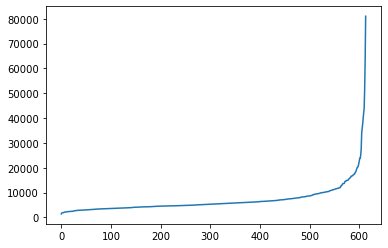

In [338]:
#plt.plot(np.sort(df['HouseIncome']))

In [336]:
#How much income do you make if you make more than 90% of the sample 
#This is equivalent to the one tail test
print("Income to make more than 90% of the sample:", stats.norm.ppf(0.9)*np.std(df['HouseIncome'])+np.mean(df['HouseIncome']))

print("Max:", np.max(df['HouseIncome']))

x = np.percentile(df['HouseIncome'], 90)

print("90th Percentile:", x)

#Percentile divides the  separate the data into 100 equal parts.
#PPF calculates the probability density

Income to make more than 90% of the sample: 15295.07281324694
Max: 81000.0
90th Percentile: 11462.800000000007


In [ ]:
#Whenever we make measurements there will always be uncertainty.
#The only thing you can be certain about is to be uncertain.

#Confidence Intervals derived from Confidence level are meant to 'reign in those uncertainties'
#CI is a range of estiamtes for the parameter that we measure.

#0.90 -> 90%
#0.95 -> 95% 96%
#0.99 -> 99%

#The higher your confidence level the larger your confidence interval 

#We can then define or margin of error = a width. It is distnace

In [354]:
#df['Loan_Amount_Term']

In [ ]:
#Lets take a look at our Categorical data 

In [157]:
print(list(df['Loan_Amount_Term']).count(8), "out of", len(df['Loan_Amount_Term']), "applicants have applied for loans with terms in 1 year")

526 out of 614 applicants have applied for loans with terms in 1 year


In [376]:
list(df['Loan_Amount_Term']).count(7)

13

In [356]:
526/614

0.8566775244299675

In [357]:
0.8566775244299675 -  0.828961576135692

0.027715948294275483

In [360]:
margin_of_error

0.027715948294275393

In [369]:
#margin_of_error
stats.norm.ppf(0.02)

-2.053748910631823

In [389]:
# Specify sample occurrences (x), sample size (n) and confidence level
x = list(df['Loan_Amount_Term']).count(8)
n = len(df['Loan_Amount_Term'])
cl = 0.99 #This is set by best practice

#Calculate 
#point estimate
#alpha - level of significance
#critical z-value
#standard error, 
#margin of error
pes = x/n
a = (1-cl)
critical_z = stats.norm.ppf(1-a/2)
standard_error = math.sqrt((pes*(1-pes)/n))
margin_of_error = critical_z * standard_error

# Calculate the lower and upper bound of the confidence interval
lower_bound = pes - margin_of_error
upper_bound = pes + margin_of_error

# Print the results
print("The" "confidence interval for the proportion of loan applicants have promised to pay back within 360 days is",lower_bound,"and",upper_bound)

The confidence interval for the proportion of loan applicants have promised to pay back within 360 days is 0.8202525939949349 and 0.8931024548650001


In [383]:
0.83341 - 0.879937

-0.046526999999999985

In [384]:
0.82896 - 0.88439

-0.05542999999999998

In [385]:
0.8202 - 0.89310

-0.07289999999999996

In [180]:
# Specify sample mean (x_bar), sample standard deviation (s), sample size (n) and confidence level
x_bar = np.mean(df['HouseIncome'])
s = np.std(df['HouseIncome'])
n = len(df['HouseIncome'])
confidence_level = 0.95

# Calculate
#Alpha
#Degrees of freedom (df)the critical t-value, and the margin of error
alpha = (1-confidence_level)
dof = n - 1
standard_error = s/math.sqrt(n)
critical_t = stats.t.ppf(1-alpha/2, dof)
margin_of_error = critical_t * standard_error

# Calculate the lower and upper bound of the confidence interval
lower_bound = x_bar - margin_of_error
upper_bound = x_bar + margin_of_error

# Print the results
print("The 95% confidence interval for the mean Houshold income is",lower_bound,"and",upper_bound)

The 95% confidence interval for the mean Houshold income is 6513.245910669699 and 7536.164252159746


In [ ]:
#The world is full of these distributions. Example is the T distribution

#Think of the sampled income for example. You have applicant income and you have coapplicant income
#We have shown that they make up two distributions.

#Now we want to compare them. There is a systematic way we can compare them. This process is called HYPOTHESIS TESTING.
#Hpothesis testing involves probability calculation and probability distributions. Applying what we've learned so far 

#I wont get into the nitty gritty details. I want to take you through it from an applied perspective

#We start with the null hypothesis:
#Null hypothesis (H0) is a claim of no difference, there is no relationship, no dependency between two or more variables
#no relationship or no dependency exists between two or more variables. 

#

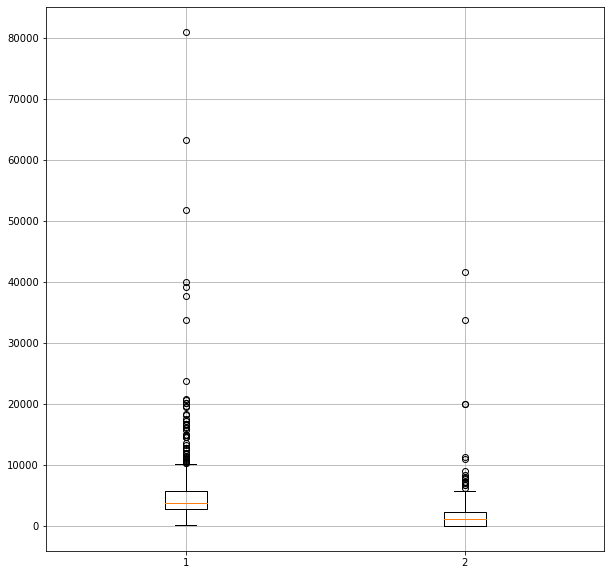

In [108]:
plt.figure(figsize=(10,10))
plt.boxplot([df['ApplicantIncome'] , df['CoapplicantIncome']])
plt.grid()
plt.show()

In [387]:
#[] #850 
#[] #110

110/850

0.12941176470588237

In [388]:
1/5

0.2

In [3]:
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline

def return_slice(input_x, input_y):
    x_container = []
    y_container = []

    for k in range(0, len(input_y)):
        if(input_y[k] < np.mean(y)+0.5*np.std(y) and input_y[k] > np.mean(y)-0.5*np.std(y)):
            x_container.append(input_x[k])
            y_container.append(input_y[k])
            
    return (x_container, y_container)

def f2(x):
    """Polynomial order 1"""
    return x * np.sin(x)

def f_ex(x):
    """Polynomial order 2"""
    ys = (-3*x**2)*np.sin(x) +2*x +5
    return(ys)

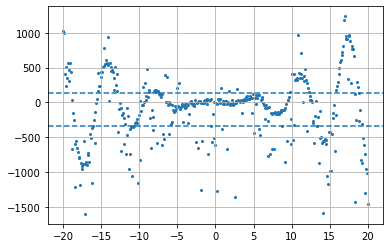

In [4]:
y = f_ex(np.linspace(-20, 20, 400))
y = y +np.random.uniform(low=-40.0, high=40.0, size=len(y)) 

values = randint(0, 400, int(0.45*400))
for vals in values:
    y[vals] = y[vals] + np.random.uniform(low=-800, high=400.0, size=1) 
    
plt.scatter(np.linspace(-20, 20, 400), y, s=4)
plt.grid()
plt.axhline(y=np.mean(y)+0.5*np.std(y), linestyle='--')
plt.axhline(y=np.mean(y)-0.5*np.std(y), linestyle='--')
plt.show()

In [5]:
x_container = []
y_container = []

for k in range(0, len(y)):
    if(y[k] < np.mean(y)+0.5*np.std(y) and y[k] > np.mean(y)-0.5*np.std(y)):
        x_container.append(np.linspace(-20, 20, 400)[k])
        y_container.append(y[k])

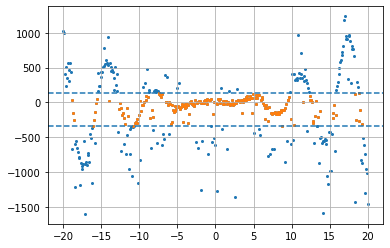

In [6]:
plt.scatter(np.linspace(-20, 20, 400), y, s=4)
plt.scatter(x_container, y_container, s=4)
plt.grid()
plt.axhline(y=np.mean(y)+0.5*np.std(y), linestyle='--')
plt.axhline(y=np.mean(y)-0.5*np.std(y), linestyle='--')
plt.show()

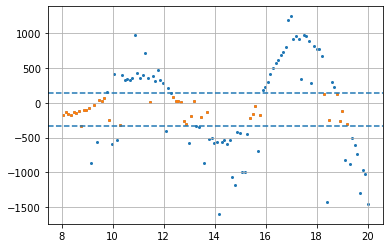

In [8]:
xs, ys = return_slice(np.linspace(-20, 20, 400)[280:], y[280:])
plt.scatter(np.linspace(-20, 20, 400)[280:], y[280:], s=4)
plt.scatter(xs, ys, s=4)
plt.grid()
plt.axhline(y=np.mean(y)+0.5*np.std(y), linestyle='--')
plt.axhline(y=np.mean(y)-0.5*np.std(y), linestyle='--')
plt.show()

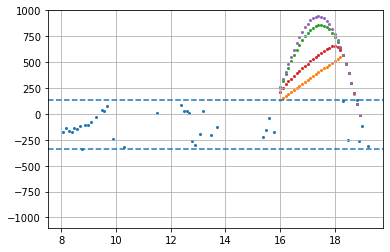

In [10]:
ax = plt.gca()
plt.scatter(xs, ys, s=4)
plt.scatter( interp1dx  , interp1dres  , s=4   )
plt.scatter( univariateSplinex , univarSplineres , s=4    )
plt.scatter( Rbfx , RbfSpline , s=4    )

plt.scatter(  np.arange(16, 19, 0.1), f_ex(np.array(np.arange(16, 19, 0.1))), s=4  )

plt.axhline(y=np.mean(y)+0.5*np.std(y), linestyle='--')
plt.axhline(y=np.mean(y)-0.5*np.std(y), linestyle='--')

ax.set_ylim([-1100, 1000])
#ax.set_xlim([10, 12])
plt.grid()
plt.show()

In [9]:
interp1dx = np.arange(16, 19, 0.1)
interp_func = interp1d(xs, f_ex(np.array(xs)))
interp1dres = interp_func(interp1dx)

univariateSplinex = np.arange(16, 19, 0.1)
interp_func = UnivariateSpline(xs,   f_ex(np.array(xs)))
univarSplineres = interp_func(univariateSplinex )

Rbfx = np.arange(16, 19, 0.1)
interp_func = Rbf(xs,  f_ex(np.array(xs)))
RbfSpline = interp_func(Rbfx)

#Reduction in complexity. For this data: The case is simple. Just a few curves

#A closely related problem is the approximation of a complicated function by a simple function. 
#Suppose the formula for some given function is known, but too complicated to evaluate efficiently. 
#A few data points from the original function can be interpolated to produce a simpler function which 
#is still fairly close to the original. The resulting gain in simplicity may outweigh the loss from interpolation error and give better performance in calculation process.